In [1]:
import nltk
import regex as re
import numpy as np
import pandas as pd
import gensim.downloader
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

# For the error
# OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

#import en_core_web_sm
#nlp = en_core_web_sm.load()

#!python -m spacy download en_core_web_sm

In [20]:
with open('text.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    
# Split text into separate lines by newline characters
lines = text.splitlines(keepends=False)

re_ws = re.compile(r'\s+')

# Replace all whitespace character like \t and \s with a single space
lines = [re_ws.sub(' ', line) for line in lines]

# Split into sentences
sentences = [sent for line in lines for sent in nltk.sent_tokenize(line)]

# Tokenize each sentence
re_split = re.compile("\s|(?<!\d)[,.](?!\d)")
sentences = [re_split.split(sent) for sent in sentences]

# Filter out non-alphabetic tokens
re_alph = re.compile(r"^[a-zA-Z']+$")
is_alpha = lambda word: re_alph.match(word) is not None

sentences = [[word.lower() for word in sentence if is_alpha(word)] for sentence in sentences]

# Extract single words and remove possesives
re_poss = re.compile(r"('s|s')$")
filtered_sentences = [[re_poss.sub('', word) for word in sentence if word not in stop_words] for sentence in sentences]
#filtered_sentences = [[re_poss.sub('', word) for word in sentence] for sentence in sentences]

all_words = [word for sentence in filtered_sentences for word in sentence]
num_words = len(all_words)

# Rejoin sentences
sentences = [' '.join(sentence) for sentence in sentences]
#filtered_sentences = [' '.join(sentence) for sentence in filtered_sentences]

#lines = [' '.join(words) for words in lines]

# Convert to lowercase
#lines = [[token.lower() for token in tokens] for tokens in lines]

# Filter stop words
#lines = [[word for word in line if word not in stop_words] for line in lines]

# Ensure alphabetic tokens
#lines = [[word for word in line if word.isalpha()] for line in lines]

# Filter out empty lines
#lines = [line for line in lines if line]

doc = ' '.join(sentences)

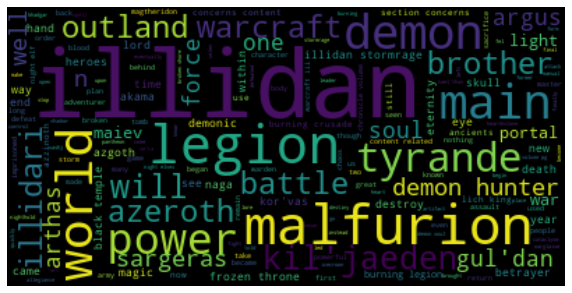

In [24]:
import collections

num_words = 0
counter = collections.Counter()

for sentence in filtered_sentences:
    for word in sentence:
        counter[word] += 1
        num_words += 1

unique_words = list(tf_counter.keys())

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(collocations=True).generate(doc)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
df_freq = pd.DataFrame({'words': counter.keys(), 'freq': counter.values()})
df_freq = df_freq.sort_values(by='freq', ascending=False)
df_freq

,words,freq
4,illidan,513
34,legion,84
52,malfurion,73
25,demon,70
8,world,65
...,...,...
1386,nemesis,1
1384,absence,1
1381,planet,1
1380,prominent,1


In [22]:
def top_mean_feats(X, min_tfidf=0.1, top_n=25):
    X.toarray()
    X[X < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform(filtered_sentences)

# (num_documents, num_unique_words)
tfidf_vectors.shape

X = tfidf_vectors.toarray()
X[X < 0.75] = 0
ave_tfidf_scores = X.mean(axis=0)

feature_names = tfidf.get_feature_names()

print(ave_tfidf_scores.shape)

df = pd.DataFrame({'word': feature_names, 'tfidf': ave_tfidf_scores})
df.sort_values(by='tfidf', ascending=False).head(20)


#names = tfidf.get_feature_names()
#vals_tfidf = tfidf.transform([' '.join(names)]).toarray().flatten()
#vals_idf = tfidf.idf_
#vals_freq = [counter[name] / num_words for name in names]

#df_res = pd.DataFrame({'word': names, 'freq': vals_freq, 'idf': vals_idf, 'tfidf': vals_tfidf})

#print(word_tfidf_vector.shape)
#new_tfs = normalized_counts.multiply(tfidf.idf_)

#print(new_tfs.shape)

#def sort_coo(coo_matrix):
#    tuples = zip(coo_matrix.col, coo_matrix.data)
#    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
#
#sorted_items = sort_coo(word_tfidf_vector.tocoo())

(2819,)


,word,tfidf
1227,iii,0.003107
1408,legion,0.003086
364,cataclysm,0.003086
267,betrayer,0.002822
398,characters,0.002725
2058,retrieved,0.002613
395,chapter,0.002437
154,argus,0.002315
1049,gamepedia,0.002315
1145,harbingers,0.002283


In [ ]:
# No need to add smoothing since all words are present in the document
# https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

print(num_words)
print(num_docs)

df = pd.DataFrame(data, columns=['word', 'tf', 'df'])
df['idf'] = np.log( (num_docs) / (df['df']) )
df['tfidf'] = df['tf'] * df['idf']
df.sort_values(by='tfidf', ascending=False).head(20)

In [ ]:
df.sort_values(by='tf', ascending=False).head(20)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(filtered_sentences)

names = tfidf.get_feature_names()
vals_tfidf = tfidf.transform([' '.join(names)]).toarray().flatten()
vals_idf = tfidf.idf_
vals_freq = [counter[name] / num_words for name in names]

df_res = pd.DataFrame({'word': names, 'freq': vals_freq, 'idf': vals_idf, 'tfidf': vals_tfidf})

#print(word_tfidf_vector.shape)
#new_tfs = normalized_counts.multiply(tfidf.idf_)

#print(new_tfs.shape)

#def sort_coo(coo_matrix):
#    tuples = zip(coo_matrix.col, coo_matrix.data)
#    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
#
#sorted_items = sort_coo(word_tfidf_vector.tocoo())

In [ ]:
names[1180]

In [ ]:
vals = tfidf.transform(['legion the illidan world demon']).toarray().flatten()
np.argwhere(vals > 0)

In [ ]:
tfidf.idf_[1180]

In [ ]:
vals[1180]

In [ ]:
df_res.sort_values(by='freq', ascending=False)

In [ ]:
df_word_freq

In [ ]:
for idx, score in sorted_items[0:100]:
    print(idx, feature_names[idx], score)

In [ ]:
list(cv.vocabulary_.keys())[:10]

In [ ]:
unique_words = list(counter.keys())

In [ ]:
len(unique_words)

In [ ]:
n_words = len(words)
n_docs = len(sentences)

# TF = (Number of time the word occurs in the text) / (Total number of words in text)
tf = {word: count / n_words for word, count in counter.items()}

# IDF = (Total number of documents / Number of documents with word in it)

x = np.array()



idf = {word: n_docs / count for word, count in counter.items()}



print(n_docs)

In [ ]:
tf

In [ ]:
unigram_model.fit([doc])

In [ ]:
scores = unigram_model.transform([' '.join(unique_words)]).toarray().flatten()

In [ ]:
print(scores.shape)

In [ ]:
words_df = pd.DataFrame({'word': unique_words, 'score': scores}).sort_values(by='score', ascending=False)
words_df

In [ ]:
words_df[words_df['word'] == 'illidan']

In [ ]:
import collections

counter = collections.Counter()

for line in lines:
    for word in line:
        counter[word] += 1
        
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(collocations=True).generate(' '.join(words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
def filter_bigrams(ngram):
    for word in ngram:
        if word in stop_words:
            return False
    return True

def filter_trigrams(ngram):
    return ngram[0] not in stop_words

def filter_quadgrams(ngram):
    return ngram[0] not in stop_words

In [ ]:
# use to find bigrams, which are pairs of words 
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder, QuadgramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures, QuadgramAssocMeasures

bigram_finder = BigramCollocationFinder.from_documents(lines) 
trigram_finder = TrigramCollocationFinder.from_documents(lines) 
quadgram_finder = QuadgramCollocationFinder.from_documents(lines) 

# raw_freq, student_t, chi_sq, likelihood_ratio, pmi

bigram_tuples = bigram_finder.score_ngrams(BigramAssocMeasures.raw_freq)
bigram_df = pd.DataFrame(bigram_tuples, columns=['bigram','score']).sort_values(by='score', ascending=False)
bigram_df = bigram_df[bigram_df['bigram'].map(lambda x: filter_bigrams(x))]

trigram_tuples = trigram_finder.score_ngrams(TrigramAssocMeasures.raw_freq)
trigram_df = pd.DataFrame(trigram_tuples, columns=['trigram','score']).sort_values(by='score', ascending=False)
trigram_df = trigram_df[trigram_df['trigram'].map(lambda x: filter_trigrams(x))]

quadgram_tuples = quadgram_finder.score_ngrams(QuadgramAssocMeasures.raw_freq)
quadgram_df = pd.DataFrame(quadgram_tuples, columns=['quadgram','score']).sort_values(by='score', ascending=False)
quadgram_df = quadgram_df[quadgram_df['quadgram'].map(lambda x: filter_quadgrams(x))]

quadgram_df

In [ ]:
bigram_finder.score_ngrams(BigramAssocMeasures.chi_sq)

In [ ]:
bigram_freq_df

In [ ]:
#filter bigrams
bigram_freq_df = pd.DataFrame(list(bigram_finder.score_ngrams(BigramAssocMeasures().student_t)), columns=['bigram', 't']).sort_values(by='t', ascending=False)
bigram_freq_df = bigram_freq_df[bigram_freq_df['bigram'].map(lambda x: filter_bigrams(x))]
bigram_freq_df

In [ ]:

#trigramTtable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.student_t)), columns=['trigram','t']).sort_values(by='t', ascending=False)

In [ ]:
bigram_freq_df

In [ ]:
trigram_freq_df

In [ ]:
#filter trigrams
trigram_freq_df = trigram_freq_df[trigram_freq_df['trigram'].map(lambda x: filter_trigrams(x))]
trigram_freq_df

In [ ]:
quadgram_freq_df

In [ ]:
quadgram_freq_df = quadgram_freq_df[quadgram_freq_df['quadgram'].map(lambda x: filter_trigrams(x))]
quadgram_freq_df

In [ ]:
trigram_collocation.nbest(TrigramAssocMeasures.likelihood_ratio, 25) 

In [ ]:
nltk.download('averaged_perceptron_tagger')

In [ ]:
nltk.pos_tag(nltk.tokenize.word_tokenize(x[0]))

In [ ]:
nltk.wordpunct_tokenize(x[0])

In [ ]:
import collections

counter = collections.Counter()

for line in lines:
    for word in line:
        counter[word] += 1

In [ ]:
counter.most_common()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

model = CountVectorizer(max_features=1000)

counts = model.fit_transform(lines)
counts.shape